In [1]:
import threerra # Load threerra

import numpy as np
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [2]:
# Load IMB Quantum credentials
from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
# Choose device
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_armonk')

# Test draw

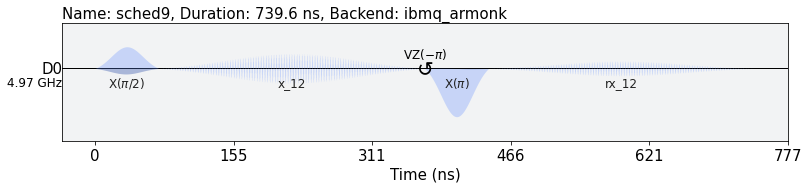

In [4]:
# Test QuantumCircuit3
qc = threerra.QuantumCircuit3(backend)
qc.rx_01(np.pi/2)
qc.x_12()
qc.rz(np.pi)
qc.x_01()
qc.rx_12(np.pi/2)
qc.draw() # You can pass arguments to draw()

# Test calibrations

In [5]:
#qc.calibrate_freq_01()

In [6]:
#qc.calibrate_pi_amp_01()

In [7]:
#qc.calibrate_freq_12()

In [8]:
#qc.calibrate_pi_amp_12()

# Test Measurement 

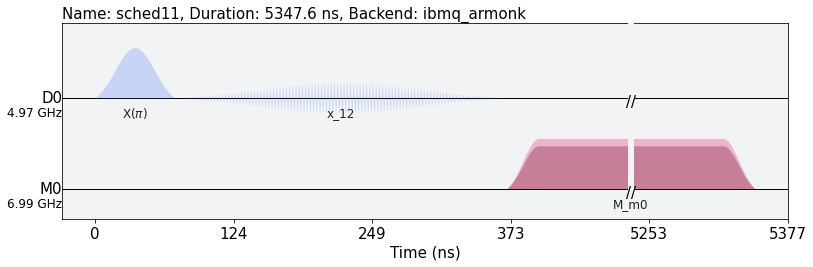

In [9]:
qc = threerra.QuantumCircuit3(backend)
qc.x_01()
qc.x_12()
qc.measure()
qc.draw()

In [10]:
job = qc.run()
job_monitor(job)

Job Status: job has successfully run


In [11]:
result = job.result()

In [12]:
from threerra.tools import get_counts

from threerra.discriminators.nearest_discriminator import discriminator as nst_disc
from threerra.discriminators.LDA_discriminator import discriminator as lda_disc

In [13]:
counts_nst = get_counts(result, discriminator=nst_disc)
counts_lda = get_counts(result, discriminator=lda_disc)

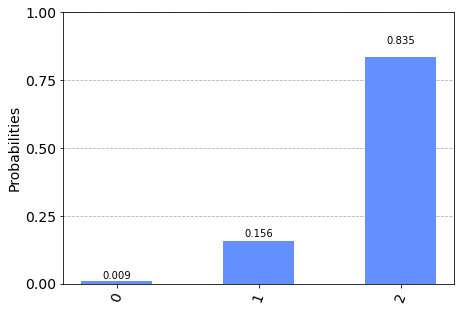

In [14]:
plot_histogram(counts_nst)

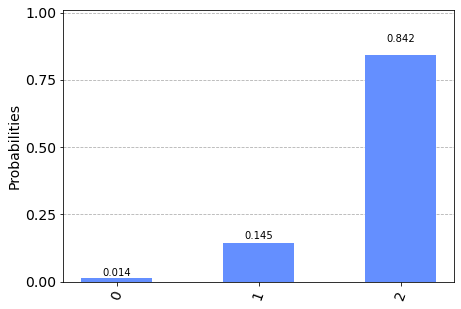

In [15]:
plot_histogram(counts_lda)